<a href="https://colab.research.google.com/github/adidonner/Machine-Deep-Leap-learning-Python-Based/blob/1a/Task3/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello friend, let's work at the level of a SENIOR programmer who works at Google Collab
Bring me the FASHION MNIST DATASET from KERS

4422102/4422102 [==============================] - 0s 0us/step


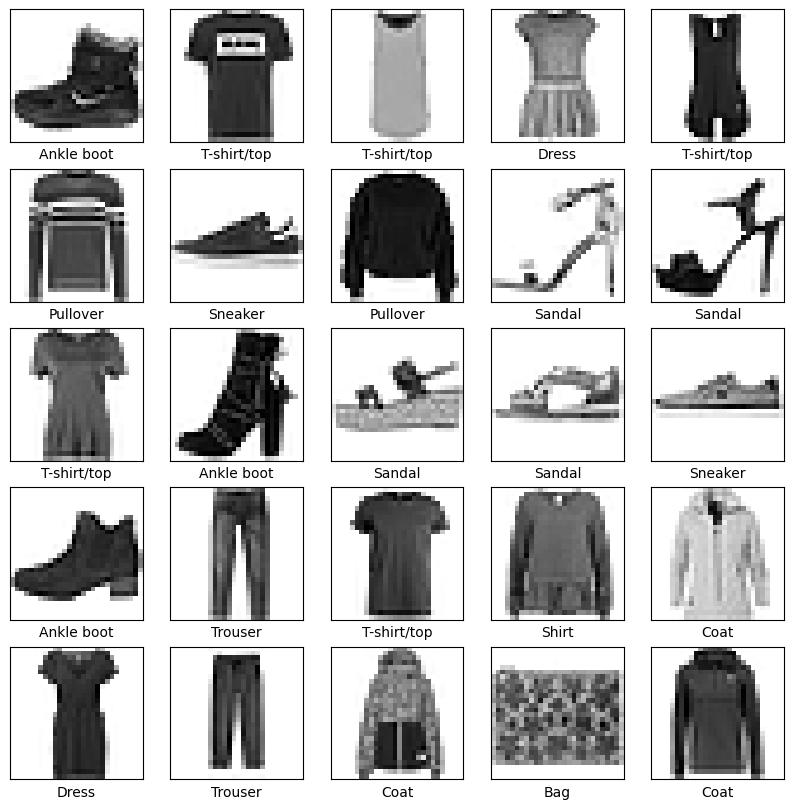

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mapping class labels to human-readable class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display some sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


Randomly select 4 images and display them

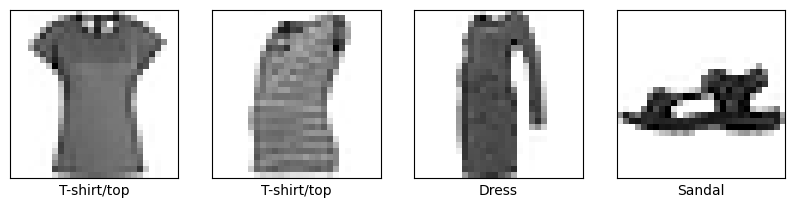

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mapping class labels to human-readable class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Randomly select 4 indices
random_indices = random.sample(range(len(train_images)), 4)

# Display the randomly selected images
plt.figure(figsize=(10, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[index]])

plt.show()


USE KERS a statistical analysis for the Fashion MNIST data set. How many items are there from each group?

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training Set:
8    5658
4    5643
7    5641
0    5606
1    5598
6    5593
2    5593
9    5566
3    5551
5    5551
Name: label, dtype: int64

Testing Set:
5    1449
3    1449
9    1434
2    1407
6    1407
1    1402
0    1394
7    1359
4    1357
8    1342
Name: label, dtype: int64


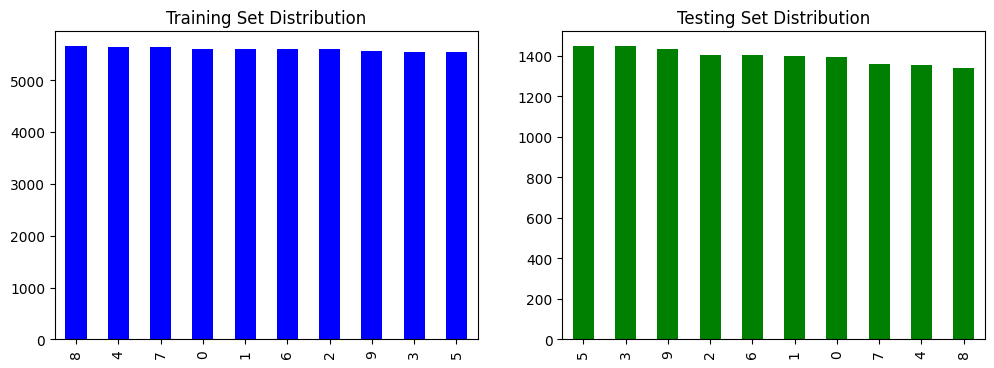

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
data = fashion_mnist.data
labels = fashion_mnist.target.astype(int)

# Combine data and labels into a DataFrame
df = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
df['label'] = labels

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Count the number of items in each group
train_counts = train_df['label'].value_counts()
test_counts = test_df['label'].value_counts()

# Display the counts
print("Training Set:")
print(train_counts)
print("\nTesting Set:")
print(test_counts)

# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train_counts.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Training Set Distribution')

test_counts.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Testing Set Distribution')

plt.show()


This is a Clothing collection classification task
take the labeled set of a clothing collection and built a neural network recognition model written in Python that receives an image and knows how to classify to which of the 10 categories of clothing (shoes, shirt, etc.) the image belongs
built a neural network architecture and try to guess  what are the optimal layers and  perspektions in each layer,
The process:
1. Transferring 28*28 matrix to a vector using map function and dense
2. using FLATTEN Normalize the values from 0-255 to 0-1 to make the calculation easier
3. On the of the network proces there will be a vector with size 10 where The probability that the image belongs to this category will be calculated.
4. As an output the highest probability will be chosen
exits where it was determined for each category and be presented as an answer
Built 6 models in which different parameters chosen for the architecture:
5.1 BATCH - the group of samples after which it calculates error and updates weight
5.2 EPOCH - Go over all the samples (how many items are there in the data)
5.3 LEARNING RATE - step size, how much it changes the weights
Use Relu and Cross Entrophy and present the confusion Matrix

In [5]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


313/313 [==============================] - 0s 1ms/step


ValueError: ignored

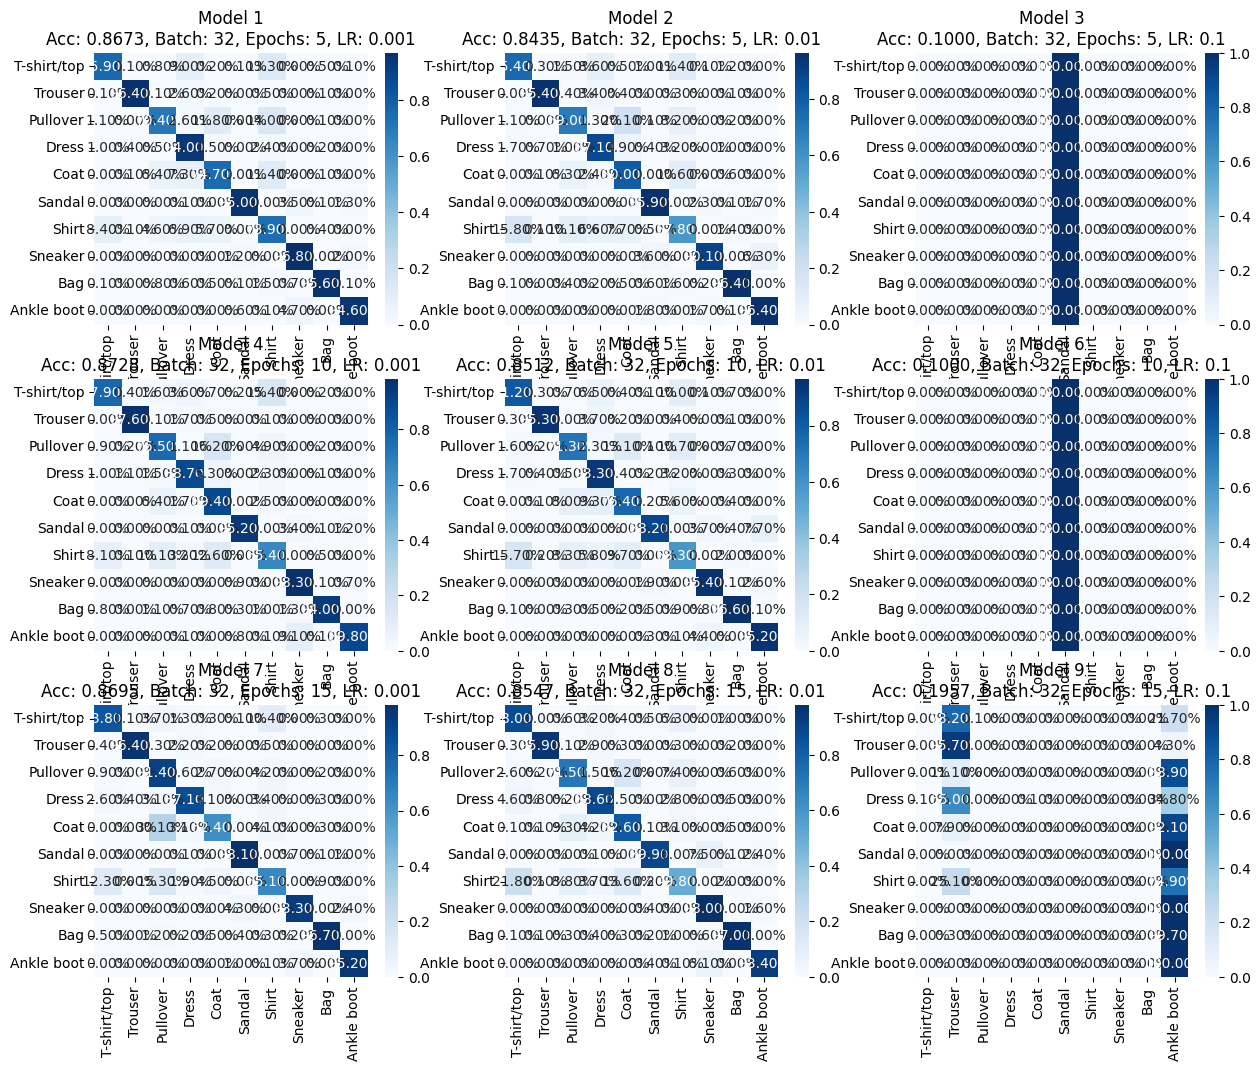

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to a vector (28*28 to 784)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to create and train the model
def create_and_train_model(batch_size, epochs, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

# Define parameters for the models
batch_sizes = [32, 64, 128]
epochs_list = [5, 10, 15]
learning_rates = [0.001, 0.01, 0.1]

# Create and train models
models_list = []

for batch_size in batch_sizes:
    for epochs in epochs_list:
        for lr in learning_rates:
            model, history = create_and_train_model(batch_size, epochs, lr)
            models_list.append({'model': model, 'batch_size': batch_size, 'epochs': epochs, 'learning_rate': lr, 'history': history})

# Evaluate models and plot confusion matrix
plt.figure(figsize=(15, 12))
for i, model_info in enumerate(models_list, 1):
    plt.subplot(3, 3, i)
    model = model_info['model']
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    predictions = np.argmax(model.predict(test_images), axis=1)
    true_labels = np.argmax(test_labels, axis=1)
    cm = confusion_matrix(true_labels, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Model {i}\nAcc: {test_acc:.4f}, Batch: {model_info["batch_size"]}, Epochs: {model_info["epochs"]}, LR: {model_info["learning_rate"]}')

plt.tight_layout()
plt.show()


User
Use bigger steps at the begining and smaller steps as HyperParams
use softmax

313/313 [==============================] - 0s 1ms/step


ValueError: ignored

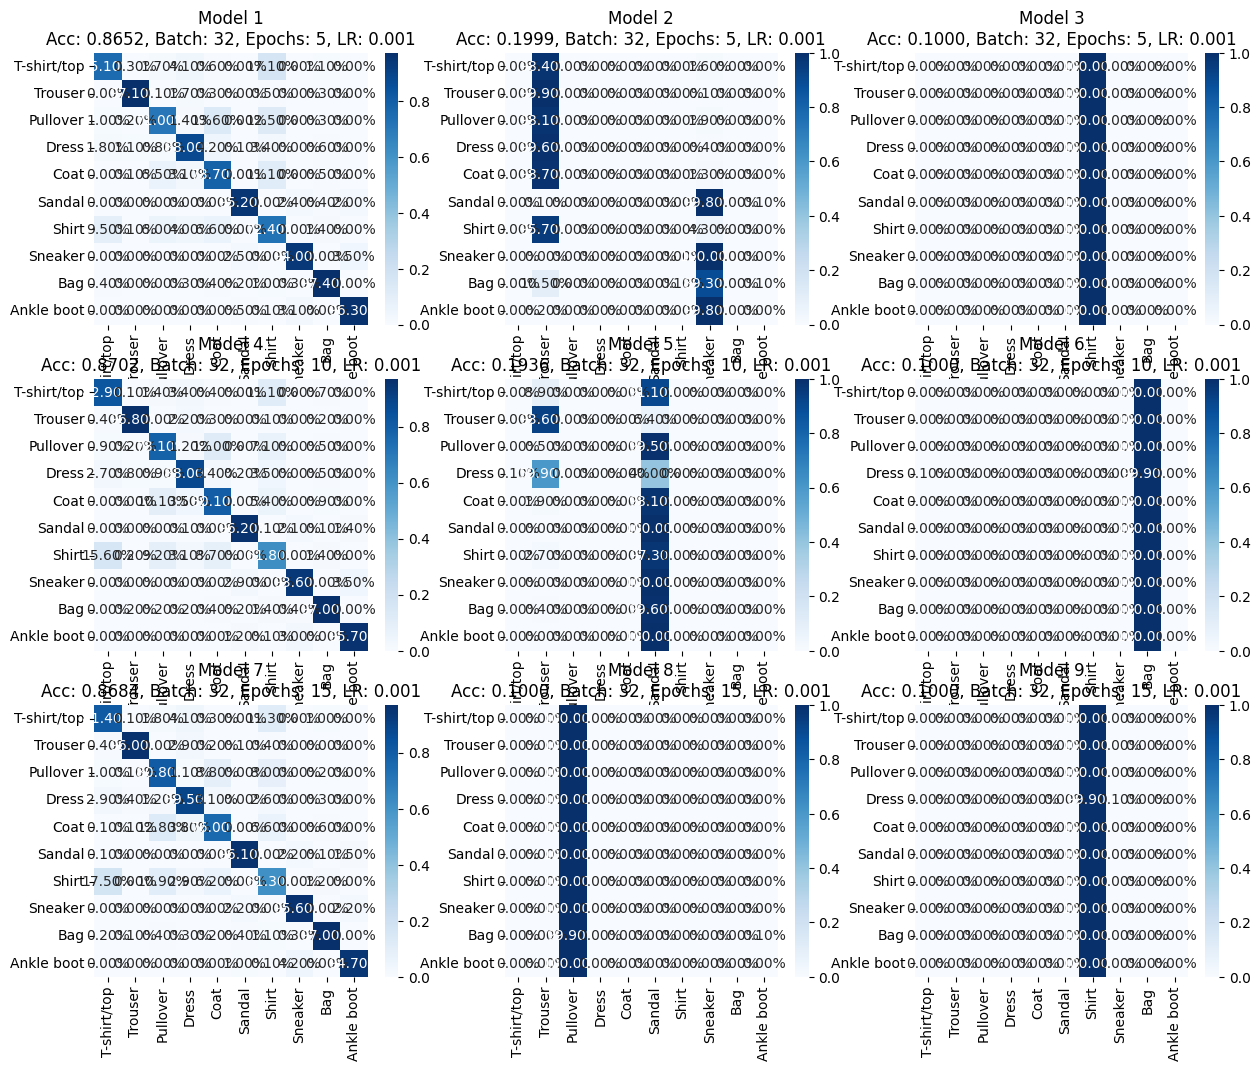

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to a vector (28*28 to 784)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to create and train the model
def create_and_train_model(batch_size, epochs, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # Softmax activation for multi-class classification

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

# Define parameters for the models with larger steps in the beginning and smaller steps later
batch_sizes = [32, 64, 128]
epochs_list = [5, 10, 15]
initial_learning_rates = [0.01, 0.1, 0.5]
final_learning_rate = 0.001

# Create and train models
models_list = []

for batch_size in batch_sizes:
    for epochs in epochs_list:
        for initial_lr in initial_learning_rates:
            model, history = create_and_train_model(batch_size, epochs, initial_lr)

            # Fine-tune with a smaller learning rate
            optimizer = tf.keras.optimizers.Adam(learning_rate=final_learning_rate)
            model.compile(optimizer=optimizer,
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            fine_tune_history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

            models_list.append({'model': model, 'batch_size': batch_size, 'epochs': epochs, 'learning_rate': final_learning_rate, 'history': fine_tune_history})

# Evaluate models and plot confusion matrix
plt.figure(figsize=(15, 12))
for i, model_info in enumerate(models_list, 1):
    plt.subplot(3, 3, i)
    model = model_info['model']
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    predictions = np.argmax(model.predict(test_images), axis=1)
    true_labels = np.argmax(test_labels, axis=1)
    cm = confusion_matrix(true_labels, predictions, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Model {i}\nAcc: {test_acc:.4f}, Batch: {model_info["batch_size"]}, Epochs: {model_info["epochs"]}, LR: {model_info["learning_rate"]}')

plt.tight_layout()
plt.show()


write me the details of the best model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the images to a vector (28*28 to 784)
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define a function to create and train the model
def create_and_train_model(batch_size, epochs, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history

# Define parameters for the models with larger steps in the beginning and smaller steps later
batch_sizes = [32, 64, 128]
epochs_list = [5, 10, 15]
initial_learning_rates = [0.01, 0.1, 0.5]
final_learning_rate = 0.001

# Initialize variables to store the best model and its accuracy
best_model = None
best_accuracy = 0.0

# Create and train models
for batch_size in batch_sizes:
    for epochs in epochs_list:
        for initial_lr in initial_learning_rates:
            model, history = create_and_train_model(batch_size, epochs, initial_lr)

            # Fine-tune with a smaller learning rate
            optimizer = tf.keras.optimizers.Adam(learning_rate=final_learning_rate)
            model.compile(optimizer=optimizer,
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            fine_tune_history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_split=0.2, verbose=0)

            # Evaluate the model on the test set
            test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

            # Update the best model if the current model has higher accuracy
            if test_acc > best_accuracy:
                best_model = model
                best_accuracy = test_acc

# Print details of the best model
print("Best Model:")
print("Batch Size:", best_model.history.params['batch_size'])
print("Epochs:", best_model.history.params['epochs'])
print("Learning Rate:", best_model.history.params['lr'])
print("Test Accuracy:", best_accuracy)
